In [2]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [3]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import scipy.stats as stats
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
from textblob import TextBlob, Word
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import string

C:\ProgramData\Anaconda3\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
C:\ProgramData\Anaconda3\lib\site-packages\socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable


In [5]:
#importing data
jobs_original = pd.read_csv('./data/alljobs_clean.csv')
print(jobs_original.shape)
jobs_original.head()

(20028, 12)


,company,company_rating,industry,job_description_all_text,job_title,location,salary_data_text,jd_no_stopwords,salary_values,salary_period,salary_multiplier,annual_salary
0,ANZ Banking Group,4.1,data,"Consultant Data Scientist – Data Activation, M...",Data Scientist Consultant,Melbourne,NaN,"['consultant', 'data', 'scientist', '–', 'data...",NaN,NaN,NaN,NaN
1,NAB - National Australia Bank,3.8,data,Work type: Permanent Full time\nLocation: Aust...,Data Scientist,Melbourne,NaN,"['work', 'type', 'permanent', 'full', 'time', ...",NaN,NaN,NaN,NaN
2,ANZ Banking Group,4.1,data,The Team\n\nThe Customer Service Operations Au...,Senior Data Scientist,Melbourne,NaN,"['team', 'customer', 'service', 'operations', ...",NaN,NaN,NaN,NaN
3,NAB - National Australia Bank,3.8,data,Work type: Permanent Full time\nLocation: Aust...,Data Analytics Engineer,Melbourne,NaN,"['work', 'type', 'permanent', 'full', 'time', ...",NaN,NaN,NaN,NaN
4,Coles,3.8,data,About Us\n\nThe Digital team is focused on rei...,Data Scientist,Melbourne,NaN,"['us', 'digital', 'team', 'focused', 'reinvent...",NaN,NaN,NaN,NaN


In [6]:
jd_df = jobs_original.copy()
print ('Total rows:',jd_df.shape[0], '\n')
print ('Rows missing data:')
jd_df.isna().sum()

Total rows: 20028 

Rows missing data:


company                        52
company_rating               9233
industry                        0
job_description_all_text        0
job_title                       0
location                        0
salary_data_text            15280
jd_no_stopwords                 0
salary_values               15280
salary_period               15280
salary_multiplier           15280
annual_salary               15280
dtype: int64

In [7]:
jd_df['gender_dominance'] = ['male' if ((industry == 'data') | (industry == 'manufacturing') | (industry == 'construction')) 
        else 'female' if ((industry == 'nursing') | (industry == 'early_learning'))
       else 'mixed' for industry in jd_df.industry]

jd_df.gender_dominance.value_counts()

mixed     8217
male      8002
female    3809
Name: gender_dominance, dtype: int64

__Above numbers raise a class imbalance concern__
Currently mixed and male classes are evenly represented, but female is much fewer; may need to collect additional data or use resampling techniques to improve balance

## Initial Visualization Plan
1. LDA (above)
2. Relationships with company rating
3. Relationships with sentiment (vader and TextBlob)
4. Word cloud
 

In [14]:
cvect = CountVectorizer(strip_accents='unicode', 
                          stop_words='english',
                          lowercase='true',
                          token_pattern=r'\b[a-zA-Z]{3,}\b',
                          max_df=0.5,
                          min_df=10)

dtm_tf = cvect.fit_transform(jd_df.job_description_all_text)
print(dtm_tf.shape)


(20028, 11440)


In [9]:
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=20, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [10]:
#visualizing results
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vect)

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2      0.150274 -0.101856       1        1  9.639716
4     -0.090868 -0.067324       2        1  8.921522
9      0.124959  0.014701       3        1  6.767130
18    -0.025978  0.187094       4        1  6.605480
14     0.013035 -0.048830       5        1  6.597103
0      0.057372 -0.076234       6        1  6.024717
13    -0.160821 -0.055369       7        1  5.654286
15    -0.049663  0.115132       8        1  4.906697
19     0.093096  0.081148       9        1  4.764357
3      0.008158 -0.054142      10        1  4.566215
11    -0.050577  0.142527      11        1  4.483073
1     -0.173964 -0.040599      12        1  4.390419
6      0.138382 -0.053922      13        1  4.366888
8      0.112811 -0.138935      14        1  3.626478
12     0.096042 -0.006652      15        1  3.596546
7     -0.245175 -0.059595      16        1  3.569301
17    -0.089011 -0.119190      17        1  3.185276
10    -0.078669  0.087280      18        1  2.934538
5      0.105781 -0.003303      19        1  2.757229
16     0.064815  0.198067      20        1  2.643029, topic_info=      Category          Freq          Term         Total  loglift  logprob
1564   Default  15130.000000          care  15130.000000  30.0000  30.0000
2651   Default  17335.000000      customer  17335.000000  29.0000  29.0000
2698   Default  16936.000000          data  16936.000000  28.0000  28.0000
1805   Default   7611.000000      children   7611.000000  27.0000  27.0000
8969   Default  10796.000000         sales  10796.000000  26.0000  26.0000
4825   Default  13107.000000        health  13107.000000  25.0000  25.0000
5888   Default   8749.000000      learning   8749.000000  24.0000  24.0000
7799   Default   6452.000000     preferred   6452.000000  23.0000  23.0000
1428   Default  27248.000000      business  27248.000000  22.0000  22.0000
9056   Default   3816.000000        school   3816.000000  21.0000  21.0000
9212   Default  17179.000000       service  17179.000000  20.0000  20.0000
3307   Default   5195.000000         early   5195.000000  19.0000  19.0000
2652   Default   9386.000000     customers   9386.000000  18.0000  18.0000
9831   Default   5127.000000         store   5127.000000  17.0000  17.0000
8620   Default  13987.000000      required  13987.000000  16.0000  16.0000
7991   Default   8351.000000       project   8351.000000  15.0000  15.0000
3367   Default   6890.000000     education   6890.000000  14.0000  14.0000
1917   Default   4708.000000      clinical   4708.000000  13.0000  13.0000
9908   Default   2920.000000      students   2920.000000  12.0000  12.0000
8726   Default   7505.000000        retail   7505.000000  11.0000  11.0000
2306   Default   4443.000000  construction   4443.000000  10.0000  10.0000
1912   Default   8911.000000       clients   8911.000000   9.0000   9.0000
4117   Default   8247.000000     financial   8247.000000   8.0000   8.0000
4115   Default   6398.000000       finance   6398.000000   7.0000   7.0000
10235  Default   7174.000000     technical   7174.000000   6.0000   6.0000
7995   Default   7261.000000      projects   7261.000000   5.0000   5.0000
3549   Default   4328.000000   engineering   4328.000000   4.0000   4.0000
4984   Default   6163.000000         hours   6163.000000   3.0000   3.0000
302    Default   2990.000000          aged   2990.000000   2.0000   2.0000
1682   Default   5180.000000        centre   5180.000000   1.0000   1.0000
...        ...           ...           ...           ...      ...      ...
10208  Topic20    509.721358       teacher    914.240827   3.0490  -5.3117
7876   Topic20    231.887711     principal    389.570466   3.1145  -6.0993
6737   Topic20    161.863525         music    255.990476   3.1749  -6.4588
5888   Topic20   2198.794375      learning   8749.518702   2.2522  -3.8499
11014  Topic20    347.535630     victorian    761.959863   2.8482  -5.6947
7271   Topic20  

In [11]:
#matching number of components to number of industries
lda_tf2 = LatentDirichletAllocation(n_components=8, random_state=0)
lda_tf2.fit(dtm_tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=8, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [12]:
#visualizing results
pyLDAvis.sklearn.prepare(lda_tf2, dtm_tf, tf_vect)

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.115416 -0.105779       1        1  25.875405
4     -0.068660  0.113657       2        1  15.301716
1     -0.041883  0.167442       3        1  12.724749
6      0.032913 -0.132633       4        1  12.584595
0     -0.119118 -0.010328       5        1   9.737151
7      0.169810 -0.002958       6        1   9.581409
3      0.005304 -0.077992       7        1   7.750163
5      0.137049  0.048591       8        1   6.444811, topic_info=      Category          Freq           Term         Total  loglift  logprob
1564   Default  15390.000000           care  15390.000000  30.0000  30.0000
4825   Default  13313.000000         health  13313.000000  29.0000  29.0000
1805   Default   7678.000000       children   7678.000000  28.0000  28.0000
2698   Default  16974.000000           data  16974.000000  27.0000  27.0000
5888   Default   8745.000000       learning   8745.000000  26.0000  26.0000
8969   Default  10915.000000          sales  10915.000000  25.0000  25.0000
3307   Default   5222.000000          early   5222.000000  24.0000  24.0000
1917   Default   4821.000000       clinical   4821.000000  23.0000  23.0000
2651   Default  17326.000000       customer  17326.000000  22.0000  22.0000
3367   Default   6937.000000      education   6937.000000  21.0000  21.0000
8726   Default   7610.000000         retail   7610.000000  20.0000  20.0000
9831   Default   5250.000000          store   5250.000000  19.0000  19.0000
1682   Default   5185.000000         centre   5185.000000  18.0000  18.0000
6950   Default   3529.000000        nursing   3529.000000  17.0000  17.0000
6947   Default   3261.000000          nurse   3261.000000  16.0000  16.0000
7995   Default   7169.000000       projects   7169.000000  15.0000  15.0000
2652   Default   9361.000000      customers   9361.000000  14.0000  14.0000
9217   Default  16097.000000       services  16097.000000  13.0000  13.0000
1428   Default  27351.000000       business  27351.000000  12.0000  12.0000
2306   Default   4352.000000   construction   4352.000000  11.0000  11.0000
4963   Default   2914.000000       hospital   2914.000000  10.0000  10.0000
7991   Default   8206.000000        project   8206.000000   9.0000   9.0000
6263   Default   3183.000000  manufacturing   3183.000000   8.0000   8.0000
6402   Default   3765.000000        medical   3765.000000   7.0000   7.0000
9908   Default   2930.000000       students   2930.000000   6.0000   6.0000
2095   Default  11883.000000        company  11883.000000   5.0000   5.0000
9056   Default   3834.000000         school   3834.000000   4.0000   4.0000
1802   Default   2568.000000          child   2568.000000   3.0000   3.0000
8635   Default   4583.000000       research   4583.000000   2.0000   2.0000
7799   Default   6422.000000      preferred   6422.000000   1.0000   1.0000
...        ...           ...            ...           ...      ...      ...
1682    Topic8   3379.258819         centre   5185.498547   2.3137  -4.3115
3033    Topic8    940.732880        diploma   1292.251621   2.4244  -5.5903
337     Topic8    889.050274            aid   1212.058137   2.4320  -5.6468
3367    Topic8   3824.139533      education   6937.378843   2.1463  -4.1879
5888    Topic8   4466.193510       learning   8745.692420   2.0699  -4.0327
5078    Topic8    672.942768            iii    929.154472   2.4193  -5.9253
3368    Topic8    700.238519    educational   1047.497175   2.3392  -5.8855
4322    Topic8    981.116922      framework   1682.179826   2.2027  -5.5483
1684    Topic8    840.908198        centres   1378.750015   2.2474  -5.7025
1696    Topic8   1289.440366    certificate   2653.395796   2.0203  -5.2750
10208   Topic8    550.479052        teacher    917.216559   2.2313  -6.1262
7974    Topic8   1719.008287        program   6296.010342   1.4437  -4.9874
11415   Topic8    639.700825          young   1264.833947   2.0602  -5.97

### Is there any relationship between company rating and dominant gender?

In [8]:
jd_df['company_rating'] = jobs_original.company_rating

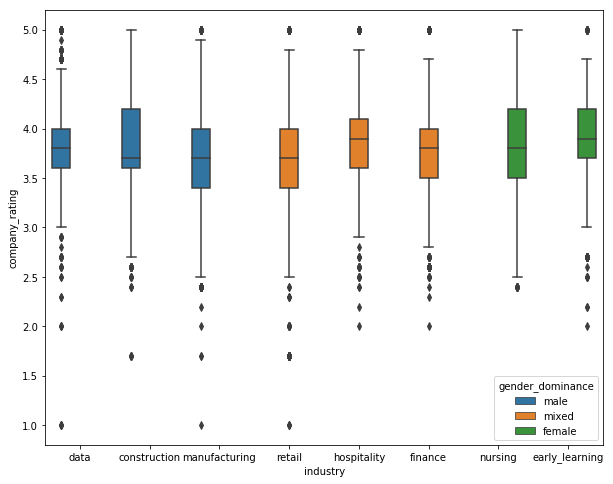

In [9]:
plt.figure(figsize=(10,8))
sns.boxplot(x='industry', y='company_rating', hue = 'gender_dominance', data=jd_df)

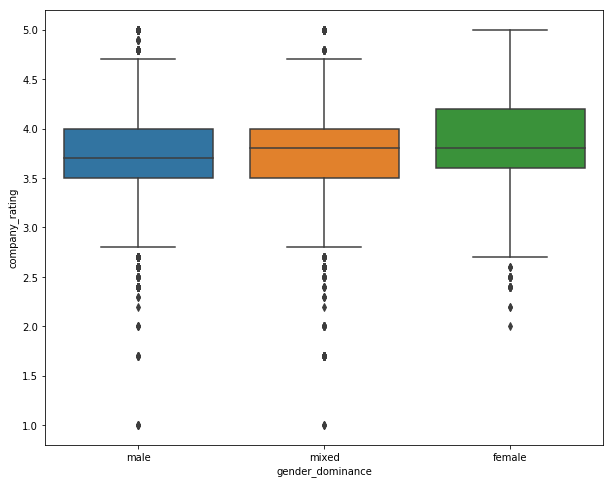

In [10]:
plt.figure(figsize=(10,8))
sns.boxplot(x='gender_dominance', y='company_rating', data=jd_df)

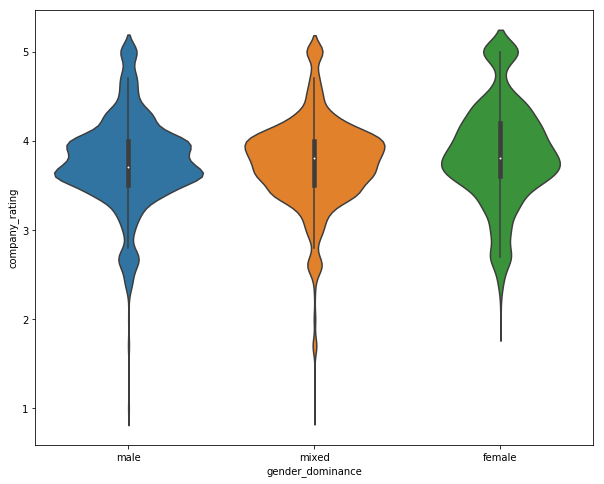

In [11]:
plt.figure(figsize=(10,8))
sns.violinplot(x='gender_dominance', y='company_rating', data=jd_df)

In [12]:
print('Mean',  '\n', jd_df.groupby('gender_dominance')['company_rating'].mean())
print('Median',  '\n', jd_df.groupby('gender_dominance')['company_rating'].median())


Mean 
 gender_dominance
female    3.853239
male      3.761165
mixed     3.759106
Name: company_rating, dtype: float64
Median 
 gender_dominance
female    3.8
male      3.7
mixed     3.8
Name: company_rating, dtype: float64


# <font color='red'> TO DO: HYPOTHESIS TEST</font>
Are the differences in means significant? Seems unlikely, but would like to test

### Is there any relationship between job description text sentiment and industry or gender dominance?
* Calculating via both vaderSentiment and TextBlob sentiment polarity

In [13]:
#currently the jd_no_stopwords column is a list of words represented as a string ("['word', 'word', ...]")
#using this to covert to just a string of words separated by spaces
#a few extraneous characters will also remain
def jd_no_stops_stripper(text):
    new_text = text.replace(',',' ').strip('[]').replace("'",'')
    return(new_text)

In [1]:
#changing full column to necessary single string format
test = jd_no_stops_stripper(jd_df.jd_no_stopwords[0])

NameError: name 'jd_no_stops_stripper' is not defined

In [15]:
jd_df.jd_no_stopwords = jd_df.jd_no_stopwords.map(jd_no_stops_stripper)

In [16]:
jd_df.jd_no_stopwords[8347]

'sc  carpentry  constructions  looking  hire  accounts  administration  assistant  small  yet  busy  office  start  asapyour  daytoday  responsibilities  managing  reception  accounts  payable  receivable  bank  general  ledger  account  reconciliation  general  adhoc  duties  managing  social  media  platformsskills  experience  must  proficient  microsoft  office  myob  experience  must  background  bookkeeping  administrationjob  type  parttimesalary  2000  3000  hourexperienceadministrative  assistant  1  year  preferred'

In [17]:
#generating sentiment for jd text
#generating two values using vaderSentiment and TextBlob

vader = SentimentIntensityAnalyzer()
jd_df['vader_sentiment'] = [vader.polarity_scores(jd) for jd in jd_df.jd_no_stopwords]

In [18]:
vader_sentiment_neg = jd_df.vader_sentiment.map(lambda x: x['neg'])
vader_sentiment_pos = jd_df.vader_sentiment.map(lambda x: x['pos'])
vader_sentiment_neu = jd_df.vader_sentiment.map(lambda x: x['neu'])
vader_sentiment_compound = jd_df.vader_sentiment.map(lambda x: x['compound'])

In [19]:
jd_df['vader_sentiment_neg'] = vader_sentiment_neg
jd_df['vader_sentiment_pos'] = vader_sentiment_pos
jd_df['vader_sentiment_neu'] = vader_sentiment_neu
jd_df['vader_sentiment_compound'] = vader_sentiment_compound

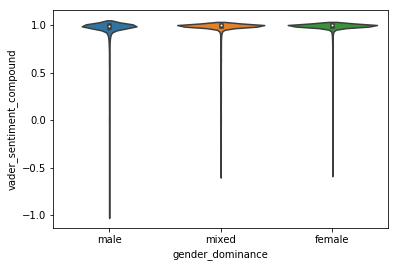

In [20]:
sns.violinplot(x='gender_dominance', y='vader_sentiment_compound', data=jd_df)

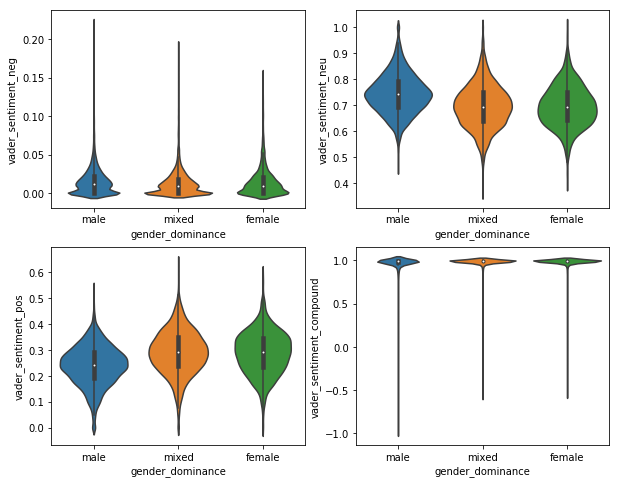

In [21]:
###need to put these and below next to each other
#visualize by industry
fig, axes = plt.subplots(2,2,figsize=(10,8))

for i, sentiment in enumerate(['neg','neu','pos','compound']):

    y_string = 'vader_sentiment_' + sentiment

    axi = plt.subplot(2,2,(i+1))     
    sns.violinplot(x='gender_dominance', y=y_string, data=jd_df, ax=axi)

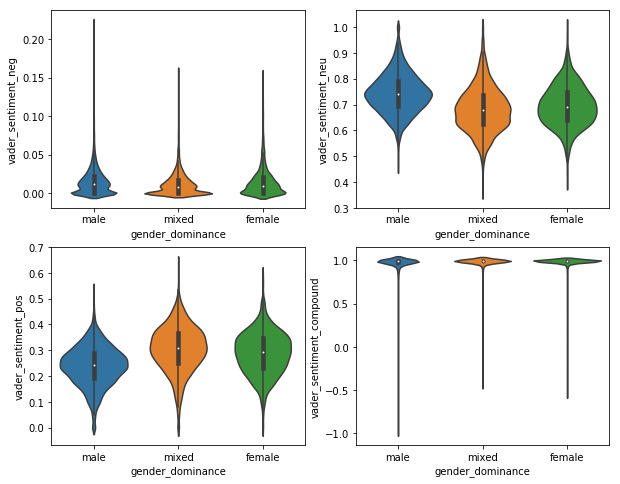

In [118]:
#any different without finance in mixed?
fig, axes = plt.subplots(2,2,figsize=(10,8))

no_finance = jd_df[jd_df.industry != 'finance']

for i, sentiment in enumerate(['neg','neu','pos','compound']):
    y_string = 'vader_sentiment_' + sentiment
    
    axi = plt.subplot(2,2,(i+1))
    sns.violinplot(x='gender_dominance', y=y_string, data=no_finance, ax=axi)

In [122]:
#what does one of the more separated distribuations look like numerically?
jd_df.groupby('gender_dominance')['vader_sentiment_neu'].agg(['mean','median']).sort_values('mean')

,mean,median
gender_dominance,,
female,0.695654,0.692
mixed,0.696162,0.694
male,0.744021,0.741


In [22]:
def detect_sentiment(text):
    return(TextBlob(text).sentiment.polarity)

In [23]:
jd_df['textblob_sentiment'] = jd_df.jd_no_stopwords.map(detect_sentiment)

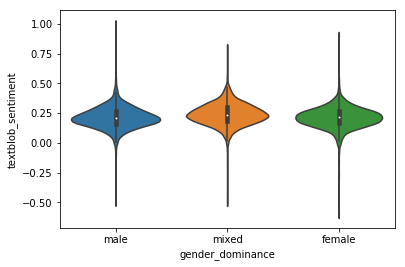

In [24]:
#visualize by gender dominance
sns.violinplot(x='gender_dominance', y='textblob_sentiment', data=jd_df)

# <font color='red'> TO DO: HYPOTHESIS TEST</font>
Are the differences in means significant? Let's run a chi squared test to investigate

H0: The difference in sentiment (starting with calculations of sentiment with largest visual difference) between industries dominated by different genders is 0. <br>
H1: The difference in sentiment between industries dominated by different genders is not 0.

In [ ]:
#could bin the data based on sentiment
#get count per bin (percentages)
#use to calculate expected for other gender
#X squared = sum(observed - expected)^2 / expected

In [125]:
#creating separate dataframe for sentiment exploration
sentiment_cols = [col for col in jd_df.columns if 'sentiment' in col]
sentiment_cols.remove('vader_sentiment')
sentiment_df = jd_df[sentiment_cols]

#adding target column
sentiment_df['gender_dominance'] = jd_df.gender_dominance

#function for creating bins for chi squared testing
def create_sentiment_bins(df, column_name, bins):
    bins_col_name = column_name + '_bins'
    df[bins_col_name] = pd.cut(sentiment_df[column_name], bins)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [126]:
#create bins for vader_neu as test
create_sentiment_bins(sentiment_df, 'vader_sentiment_neu', 20)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [127]:
#create sentiment bins
for column in sentiment_cols:
    create_sentiment_bins(sentiment_df, column, 15)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [128]:
bins_columns = [column for column in sentiment_df.columns if 'bins' in column]

In [ ]:
for column in bin_columns:
    

In [60]:
#pull counts in bins from male
male_neu_bins = sentiment_df[sentiment_df['gender_dominance'] == 'male'].groupby('vader_sentiment_neu_bins')['vader_sentiment_neu'].count()
male_neu_bins

vader_sentiment_neu_bins
(0.366, 0.399]       0
(0.399, 0.43]        0
(0.43, 0.462]        1
(0.462, 0.494]       4
(0.494, 0.525]      10
(0.525, 0.557]      19
(0.557, 0.589]      90
(0.589, 0.62]      232
(0.62, 0.652]      495
(0.652, 0.684]     833
(0.684, 0.715]    1191
(0.715, 0.747]    1397
(0.747, 0.778]    1311
(0.778, 0.81]      952
(0.81, 0.842]      641
(0.842, 0.873]     399
(0.873, 0.905]     222
(0.905, 0.937]     107
(0.937, 0.968]      50
(0.968, 1.0]        48
Name: vader_sentiment_neu, dtype: int64

In [83]:
total_male = male_neu_bins.sum()
percent_bins = [(number / total_male) for number in male_neu_bins]
percent_bins

[0.0,
 0.0,
 0.00012496875781054737,
 0.0004998750312421895,
 0.0012496875781054736,
 0.0023744063984004,
 0.011247188202949263,
 0.02899275181204699,
 0.06185953511622094,
 0.10409897525618596,
 0.1488377905523619,
 0.17458135466133468,
 0.1638340414896276,
 0.11897025743564109,
 0.08010497375656087,
 0.0498625343664084,
 0.027743064233941513,
 0.013371657085728569,
 0.006248437890527368,
 0.005998500374906273]

In [68]:
female_neu_bins= sentiment_df[sentiment_df['gender_dominance'] == 'female'].groupby('vader_sentiment_neu_bins')['vader_sentiment_neu'].count()
female_neu_bins

vader_sentiment_neu_bins
(0.366, 0.399]      0
(0.399, 0.43]       4
(0.43, 0.462]       5
(0.462, 0.494]      8
(0.494, 0.525]     38
(0.525, 0.557]     66
(0.557, 0.589]    156
(0.589, 0.62]     344
(0.62, 0.652]     528
(0.652, 0.684]    589
(0.684, 0.715]    597
(0.715, 0.747]    499
(0.747, 0.778]    385
(0.778, 0.81]     307
(0.81, 0.842]     154
(0.842, 0.873]     73
(0.873, 0.905]     38
(0.905, 0.937]      7
(0.937, 0.968]      6
(0.968, 1.0]        5
Name: vader_sentiment_neu, dtype: int64

In [81]:
total_female = female_neu_bins.sum()
female_expected_neu = [int(total_female * percent) for percent in percent_bins] 
female_expected_neu

[0,
 0,
 0,
 1,
 4,
 9,
 42,
 110,
 235,
 396,
 566,
 664,
 624,
 453,
 305,
 189,
 105,
 50,
 23,
 22]

In [73]:
import scipy.stats as stats

In [112]:
observed = np.array(female_neu_bins)[3:20]
expected = np.array(female_expected_neu)[3:20]
print(len(expected), len(actual), '\n', actual, '\n', expected)

17 17 
 [  8  38  66 156 344 528 589 597 499 385 307 154  73  38   7   6   5] 
 [  1   4   9  42 110 235 396 566 664 624 453 305 189 105  50  23  22]


In [107]:
chi2_vader_neu = stats.chisquare(actual, expected)
chi2_vader_neu


Power_divergenceResult(statistic=2398.270158388825, pvalue=0.0)

In [88]:
print(len(female_expected_neu), len(female_neu_bins))

20 20


In [89]:
np.array(female_neu_bins)

array([  0,   4,   5,   8,  38,  66, 156, 344, 528, 589, 597, 499, 385,
       307, 154,  73,  38,   7,   6,   5], dtype=int64)

In [111]:
critical = stats.chi2.ppf(q=.95, df=16)
print(critical)

26.29622760486423


In [117]:
formula = sum(((observed - expected)**2 )/ expected)
p_val = 1-stats.chi2.cdf(x=(formula), df=16)

In [119]:
formula, p_val

(2398.2701583888256, 0.0)

In [152]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 


In [185]:
def get_top_n_words(corpus, n=None):
    """
    Create dictionary of the top n words in a vocabulary according to occurrence in a text corpus.

    """
    cvec = CountVectorizer().fit(corpus)
    bag_of_words = cvec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

### What are the overall top words across all jds?
Some of these may need to be added to stopwords as they will be uninformative <br>
Will need to investigate, though, as some may still be informative

In [165]:
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

def create_word_cloud(string, image_template, file_path):
   maskArray = np.array(Image.open(image_template))
   cloud = WordCloud(background_color = "white", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
   cloud.generate(string)
   cloud.to_file(file_path)


In [197]:
import multidict as multidict

import os
from PIL import Image
from os import path
from wordcloud import WordCloud


def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict


def makeImage(text,image_template):
    alice_mask = np.array(Image.open(image_template))

    wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


# # get data directory (using getcwd() is needed to support running example in generated IPython notebook)
# d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# text = open(path.join(d, 'alice.txt'), encoding='utf-8')
# text = text.read()
# makeImage(getFrequencyDictForText(text))

In [186]:
top_100_words = get_top_n_words(jd_df.jd_no_stopwords)
top_100_words[0:5]

[('experience', 45969),
 ('work', 43069),
 ('team', 41267),
 ('role', 32960),
 ('skills', 27861)]

In [201]:
top_100_dict = dict((x,y) for x, y in top_100_words)

{'experience': 45969,
 'work': 43069,
 'team': 41267,
 'role': 32960,
 'skills': 27861,
 'business': 27012,
 'working': 23996,
 'management': 21628,
 'apply': 17606,
 'ability': 17601,
 'support': 17550,
 'opportunity': 17391,
 'service': 16687,
 'data': 16645,
 'customer': 16640,
 'within': 15793,
 'services': 15714,
 'environment': 15384,
 'people': 15298,
 'including': 15019,
 'please': 15012,
 'care': 14988,
 'development': 14843,
 'strong': 14475,
 'new': 13993,
 'health': 12714,
 'across': 12225,
 'required': 12104,
 'position': 12008,
 'provide': 11950,
 'time': 11872,
 'career': 11854,
 'years': 11698,
 'looking': 11626,
 'company': 11567,
 'high': 11433,
 'australia': 11335,
 'join': 10979,
 'part': 10687,
 'successful': 10680,
 'quality': 10411,
 'sales': 10409,
 'knowledge': 10393,
 'client': 10270,
 'communication': 10128,
 'opportunities': 10074,
 'job': 9636,
 'us': 9519,
 'customers': 9368,
 'training': 9335,
 'ensure': 9320,
 'manager': 9203,
 'staff': 9135,
 'clients':

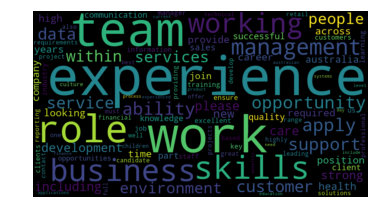

In [202]:
wordcloud = WordCloud(width=900,height=500, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(top_100_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

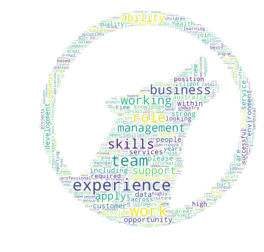

In [211]:
makeImage(top_100_dict, './images/wolf_template.png')

In [212]:
top100words_by_industry = {}
for industry in jd_df.industry.unique():
    
    corpus = jd_df.jd_no_stopwords[jd_df.industry == industry]
    top_100_words = get_top_n_words(corpus, n=100)

    top_100_dict = dict((x,y) for x, y in top_100_words)
    
    top100words_by_industry[industry] = top_100_dict


DATA


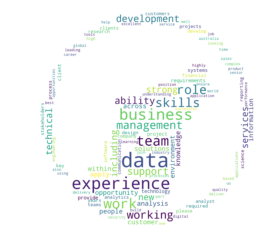

CONSTRUCTION


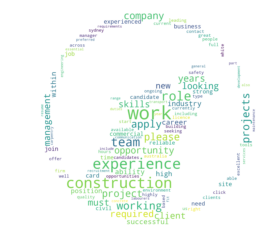

MANUFACTURING


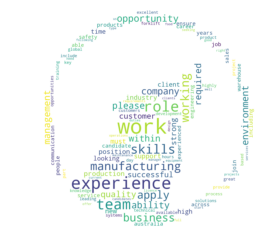

RETAIL


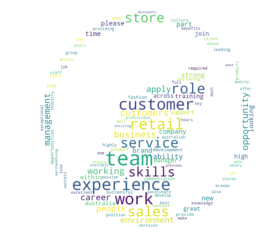

HOSPITALITY


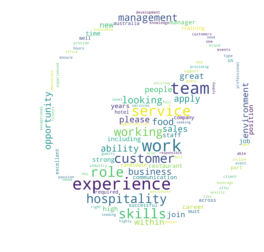

FINANCE


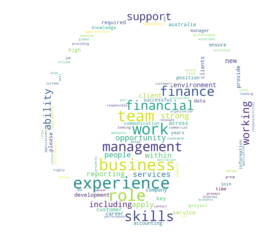

NURSING


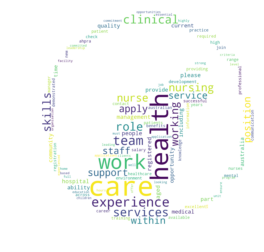

EARLY_LEARNING


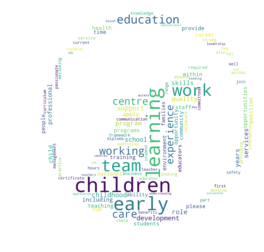

In [224]:
##CREATE WORD CLOUDS FOR EACH INDUSTRY
for industry in jd_df.industry.unique():
    print(industry.upper())
    makeImage(top100words_by_industry[industry], './images/wolf_template.png')

### Checking level of use of gender coded words

For this portion of the analysis, we are using the word list from Gender Decoder (http://gender-decoder.katmatfield.com/), a free online tool to analyze gender coding in job descriptions. You can learn more about the research behind this word list here (http://gender-decoder.katmatfield.com/static/documents/Gaucher-Friesen-Kay-JPSP-Gendered-Wording-in-Job-ads.pdf).

Some noteable points:
1. The research is from 2011. I am curious if any updated research on word associations exists.
2. The research was conducted in Canada. I think that gender cultures in Australia and Canada share many features, but there is also a potential mis-representation when using other context social research.



In [242]:
masculine_coded_words = pd.read_csv('./data/masculine_coded_words.txt', names=['masculine'])
feminine_coded_words = pd.read_csv('./data/feminine_coded_words.txt', names = ['feminine'])
print(len(masculine_coded_words.masculine), len(feminine_coded_words.feminine))

52 50


In [257]:
test_dict = dict((x,y) for x, y in get_top_n_words(word_tokenize(jd_df.jd_no_stopwords[52])))
test_dict

{'media': 13,
 'agency': 12,
 '2018': 11,
 'team': 10,
 'data': 8,
 'experience': 7,
 'new': 7,
 'year': 7,
 'working': 6,
 'creativity': 5,
 'brand': 5,
 'part': 5,
 'programmatic': 5,
 'planning': 4,
 'one': 4,
 'work': 4,
 'marketing': 4,
 'leading': 4,
 'looking': 4,
 'things': 4,
 'technology': 4,
 'clients': 4,
 'adobe': 4,
 'partners': 4,
 'recommendations': 4,
 'dbm': 4,
 'ability': 4,
 'ever': 3,
 'connected': 3,
 'creative': 3,
 'deliver': 3,
 'role': 3,
 'bought': 3,
 'advertising': 3,
 'che': 3,
 'proximity': 3,
 'change': 3,
 'way': 3,
 'particularly': 3,
 'innovation': 3,
 'client': 3,
 'delivering': 3,
 'best': 3,
 'right': 3,
 'business': 3,
 'solutions': 3,
 'strong': 3,
 'lead': 3,
 'australian': 3,
 'gold': 3,
 'silver': 3,
 'medium': 2,
 'message': 2,
 'sequencing': 2,
 'inseparable': 2,
 'history': 2,
 'strategic': 2,
 'ensure': 2,
 'create': 2,
 'today': 2,
 'expression': 2,
 'big': 2,
 'brands': 2,
 'idea': 2,
 'agnostic': 2,
 'addressable': 2,
 'done': 2,
 'toge

### <font color = 'red'> Need to check stemmed words are matching correctly </font>

In [265]:
#for words in masculine & feminine lists (used as stems), check if in jd, if so, store word and count from dictionary
#very unsure this is pulling out all relevant matches

def match_word_count(text, word_list = masculine_coded_words.masculine):
    
    '''Accepts a string of text, and returns the words and frequencies
    which match the provided list. Default uses masculine coded words, but other word lists can be supplied.'''
    
    match_words = {}
    frequency_dictionary = dict((x,y) for x,y in get_top_n_words(word_tokenize(text)))
    
    for word in word_list:
        if word in frequency_dictionary.keys():
            match_words[word] = frequency_dictionary[word]
    
    return match_words


In [266]:
jd_df['masculine_coded'] = [match_word_count(jd) for jd in jd_df.jd_no_stopwords]

In [268]:
jd_df['feminine_coded'] = [match_word_count(jd, feminine_coded_words.feminine) for jd in jd_df.jd_no_stopwords]

In [269]:
#defining gender balance as the differene in number of occurrences of masculine and feminine coded words
#in this instance masculine encoding will be a positive number, feminine negative

def get_gender_balance(masculine, feminine):
    """Accepts dictionaries of words and frequencies for masculine and feminine coded words in a text
    Returns the difference in number total number of uses (masculine - feminine)"""
    
    masculine_total = sum(list(masculine.values()))
    feminine_total = sum(list(feminine.values()))
                          
    gender_balance = (masculine_total - feminine_total)
    
    return gender_balance
                          


In [272]:
jd_df['gender_balance'] = [get_gender_balance(jd_df.masculine_coded[i], jd_df.feminine_coded[i]) for i in jd_df.index]

In [274]:
print(jd_df.masculine_coded[85], jd_df.feminine_coded[85])
jd_df.gender_balance[85]

{'active': 2, 'dominant': 1, 'driven': 2, 'force': 1} {'connect': 1, 'support': 1, 'understand': 1}


3

In [277]:
jd_df.groupby('industry')['gender_balance'].mean()

industry
construction     -0.295905
data             -1.367028
early_learning   -2.544087
finance          -1.528602
hospitality      -0.484340
manufacturing    -0.551864
nursing          -1.494459
retail           -0.476744
Name: gender_balance, dtype: float64

In [278]:
jd_df.groupby('industry')['gender_balance'].median()

industry
construction      0
data             -1
early_learning   -2
finance          -1
hospitality       0
manufacturing     0
nursing          -1
retail            0
Name: gender_balance, dtype: int64

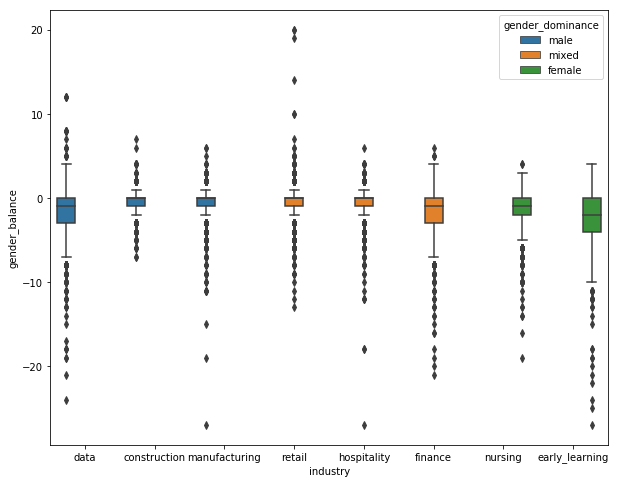

In [275]:
#plot gender balance by industry
plt.figure(figsize=(10,8))
sns.boxplot(x='industry', y='gender_balance', hue='gender_dominance', data=jd_df)

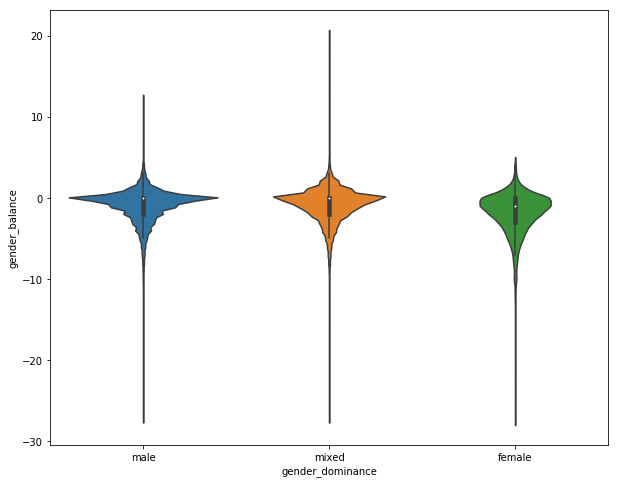

In [279]:
#plot gender balance by gender dominance
plt.figure(figsize=(10,8))
sns.violinplot(x='gender_dominance', y='gender_balance', data=jd_df)

### Curious to pull out masculine and feminine totals separately
Are job descriptions generally including both masculine and feminine or neither?


### Checking overall size of range of words use in jds

In [135]:
vocab_size = [len(set(word_tokenize(jd))) for jd in jd_df.jd_no_stopwords]

In [141]:
jd_df['vocab_size'] = vocab_size

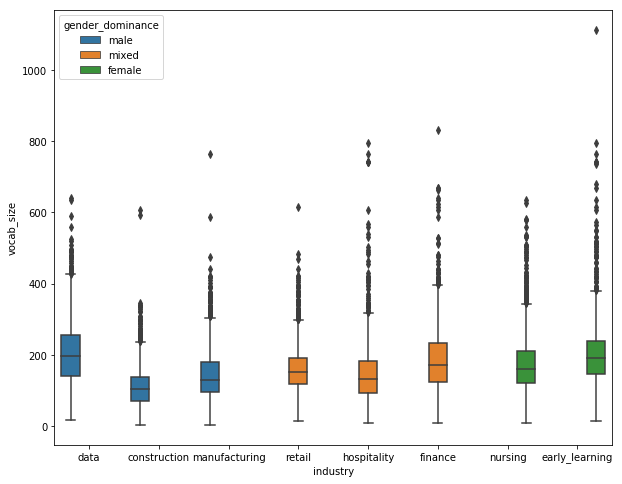

In [144]:
#visualize by industry
plt.figure(figsize=(10,8))
sns.boxplot(x='industry', y='vocab_size', hue='gender_dominance', data=jd_df)

In [149]:
#another way of looking at vocab size - this one still includes stopwords
cvect = CountVectorizer()

industry_vocab_size = {}
for industry in set(jd_df.industry.values):
    corpus = jd_df.job_description_all_text[jd_df.industry == industry]
    vocab_size = cvect.fit_transform(corpus).shape[1]
    industry_vocab_size[industry] = vocab_size


In [150]:
industry_vocab_size

{'construction': 13886,
 'manufacturing': 23081,
 'early_learning': 15616,
 'finance': 22587,
 'nursing': 18853,
 'data': 27508,
 'hospitality': 19527,
 'retail': 21587}

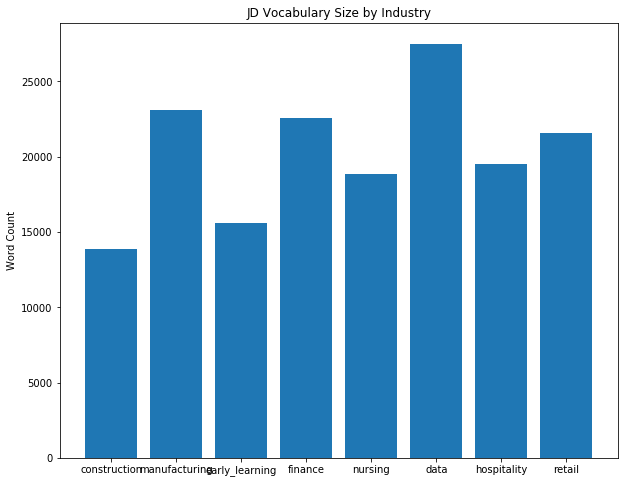

In [281]:
#add hue of gender??
lists = industry_vocab_size.items()
x, y = zip(*lists)

plt.figure(figsize=(10,8))
plt.bar(x, y)
plt.title('JD Vocabulary Size by Industry')
plt.ylabel('Word Count')
plt.show()

### Looking at relationships with salary

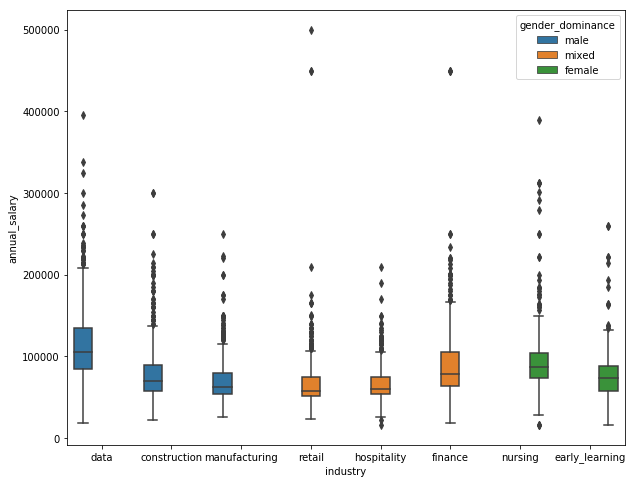

In [145]:
plt.figure(figsize=(10,8))
sns.boxplot(x='industry', y='annual_salary', hue='gender_dominance', data=jd_df)

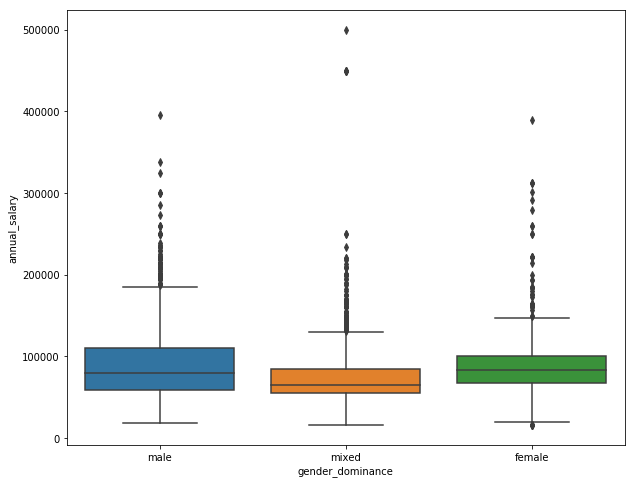

In [146]:
plt.figure(figsize=(10,8))
sns.boxplot(x='gender_dominance', y='annual_salary', data=jd_df)

### Still to do

__Priority: Modelling__ <br>
* LDA with 3 components
* 2 clustering models
* 2 classification models
<br>

Other
1. Check for # of qualifications/requirements
2. Check for differences across levels (as rep of women is lower in mgt, even in female-dominated industries)
3. Check for inclusion of equal opportunity employer statements
4. Experiment with different sets of stopwords / token patterns
5. Look at requirements for each industry (number of qualifications / requirements per jd)
6. Try scattertext
7. Explore nltk / spaCy libraries